In [1]:
#importaciones
from IPython.display import HTML
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import _converter
plt.subplots(figsize=(15,4))
%matplotlib inline 
plt.style.use('default')
import datetime
import math
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
# Leyendo csvs
df_edu = pd.read_csv("../datos_navent_fiuba/fiuba_1_postulantes_educacion.csv")
df_gen_edad = pd.read_csv("../datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv", parse_dates=['fechanacimiento'])
df_vistas = pd.read_csv("../datos_navent_fiuba/fiuba_3_vistas.csv", parse_dates=['timestamp'])
df_postulaciones = pd.read_csv("../datos_navent_fiuba/fiuba_4_postulaciones.csv", parse_dates=['fechapostulacion'])
df_avisos_detalle = pd.read_csv("../datos_navent_fiuba/fiuba_6_avisos_detalle.csv")

### Analisis del rango de fechas para las que se tienen vistas y postulaciones

In [21]:
df_postulaciones['fechapostulacion'][df_postulaciones['fechapostulacion'].idxmin()]

Timestamp('2018-01-15 00:00:01')

In [22]:
df_postulaciones['fechapostulacion'][df_postulaciones['fechapostulacion'].idxmax()]

Timestamp('2018-02-28 23:59:55')

In [24]:
df_vistas['timestamp'][df_vistas['timestamp'].idxmin()]

Timestamp('2018-02-23 18:38:10.808000')

In [25]:
df_vistas['timestamp'][df_vistas['timestamp'].idxmax()]

Timestamp('2018-03-01 04:59:56.812000')

# ¿Cuál es la cantidad de avisos y postulaciones por nivel laboral area?

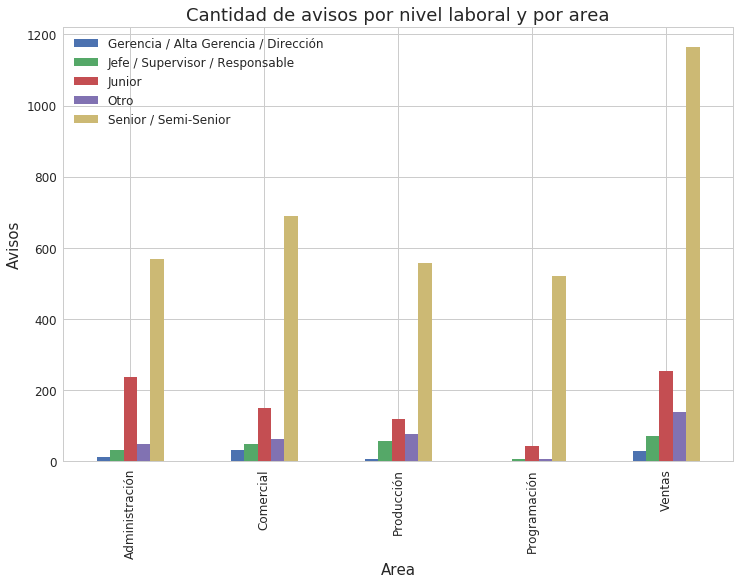

In [214]:
#obtenemos las 5 areas con mas avisos, no se si esto esta bien me tira el mismo resultado que con el groupby, usado por Martin
top_areas = df_avisos_detalle['nombre_area'].value_counts().sort_values(ascending=False).head(5).keys().tolist()

df_top_area_laboral = df_avisos_detalle.loc[df_avisos_detalle['nombre_area'].isin(top_areas)]\
    .groupby(['nombre_area','nivel_laboral']).agg({'nombre_area':'count'})\
    .rename(columns = {'nombre_area':'cant_avisos'})
    
axs = df_top_area_laboral.reset_index().pivot(index = 'nombre_area', columns = 'nivel_laboral', values='cant_avisos')\
    .plot(kind = 'bar', figsize =(12,8), fontsize = 12\
          ,title ='Cantidad de avisos por nivel laboral y por area')
axs.set_ylabel('Avisos', size = 15)
axs.set_xlabel('Area', size = 15)
axs.legend(fontsize = 12)
axs.title.set_size(18)

In [197]:
#uso las mismas postulaciones que Martin
df_posts_avisos = df_avisos_detalle[['idaviso','nombre_area','denominacion_empresa','nivel_laboral']].merge(df_postulaciones[['idaviso','fechapostulacion','idpostulante']], on='idaviso')


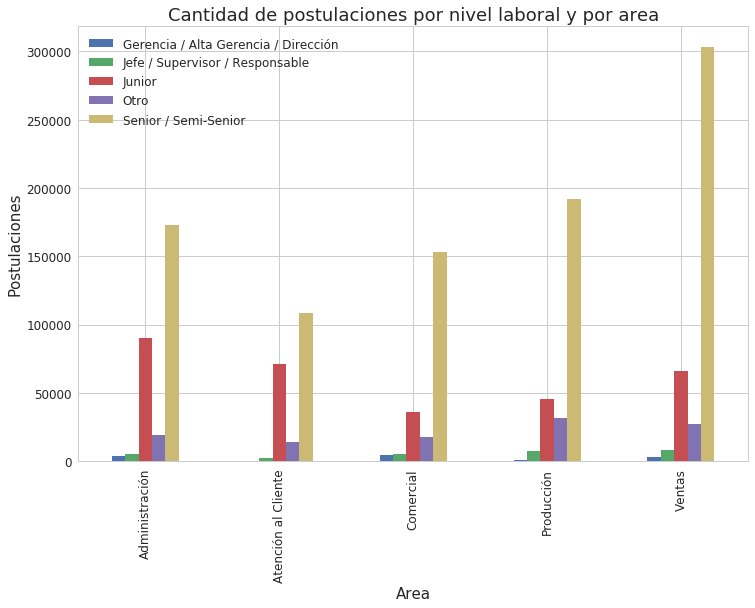

In [217]:
top_post_area = df_posts_avisos['nombre_area'].value_counts().sort_values(ascending = False).head(5).keys().tolist()
df_top_posts_area =  df_posts_avisos.loc[df_posts_avisos['nombre_area'].isin(top_post_area)]\
    .groupby(['nombre_area','nivel_laboral']).agg({'nombre_area':'count'})\
    .rename(columns = {'nombre_area':'count'})
    
axs = df_top_posts_area.reset_index().pivot(index = 'nombre_area', columns = 'nivel_laboral', values='count')\
    .plot(kind = 'bar', figsize =(12,8), fontsize = 12\
          ,title ='Cantidad de postulaciones por nivel laboral y por area')
axs.set_ylabel('Postulaciones', size = 15)
axs.set_xlabel('Area', size = 15)
axs.legend(fontsize = 12)
axs.title.set_size(18)